# 06-03 Linear Regression(선형 회귀)


출처:https://wikidocs.net/21670


## 1. 선형 회귀(Linear Regression)

1) 단순 선형 회귀 분석(Simple Linear Regression Analysis)
2) 다중 선형 회귀 분석(Multiple Linear Regression Analysis)


## 2. 가설(Hypothesis) 세우기


## 3. 비용 함수(Cost function) : 평균 제곱 오차(MSE)

목적 함수(Objective function) 
또는 비용 함수(Cost function) 
또는 손실 함수(Loss function) 

제값과 예측값에 대한 오차를 표현하면 되는 것이 아니라, 예측값의 오차를 줄이는 일에 최적화 된 식



## 4. 옵티마이저(Optimizer) : 경사하강법(Gradient Descent)

옵티마이저(Optimizer) 또는 최적화 알고리즘

# 06-04 자동 미분과 선형 회귀 실습

## 1. 자동 미분



In [23]:
import tensorflow as tf

# tape_gradient()는 자동 미분 기능을 수행합니다. 임의로 
# 2W^2 + 5 라는 식을 세워보고, 에 대해 미분해보겠습니다.

w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [24]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

# gradients를 출력하면 W 에 대해 미분한 값이 저장된 것을 확인할 수 있습니다.



[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


## 2. 자동 미분을 이용한 선형 회귀 구현

우선 가중치 변수 w와 b를 선언합니다. 학습될 값이므로 임의의 값인 4와 1로 초기화하였습니다.

In [25]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [26]:
@tf.function
def hypothesis(x):
  return w*x + b

In [27]:
# 현재의 가설에서 w와 b는 각각 4와 1이므로 임의의 입력값을 넣었을 때의 결과는 다음과 같습니다.

x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [28]:
# 다음과 같이 평균 제곱 오차를 손실 함수로서 정의합니다.

@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

# 여기서 사용할 데이터는 x와 y가 약 10배의 차이를 가지는 데이터입니다.



In [29]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

# 옵티마이저는 경사 하강법을 사용하되, 학습률(learning rate)는 0.01을 사용합니다.

In [30]:
optimizer = tf.optimizers.SGD(0.01)


In [31]:
# 약 300번에 걸쳐서 경사 하강법을 수행하겠습니다.

for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

w와 b값이 계속 업데이트 됨에 따라서 cost가 지속적으로 줄어드는 것을 확인할 수 있습니다. 학습된 w와 b의 값에 대해서 임의 입력을 넣었을 경우의 예측값을 확인해봅시다.

In [32]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


## 3. 케라스로 구현하는 선형 회귀

Sequential로 model이라는 이름의 모델을 만들고, 그리고 add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보들을 추가해갑니다.

출력 차원 1-out put dim 으로 표현되는 인자

두번째 인자인 input_dim 은 입력의 차원을 정의. 
-> 1개의 실수 x를 가지고 하는 1개의 실수 y를 예측하는 단순 선형 회귀를 구현하는 경우에는 각각 1의 값

#### 예시 코드. 실행 불가.
model = Sequential()
model.add(keras.layers.Dense(1, input_dim=1))


 activation은 어떤 함수를 사용할 것인지를 의미하는데 선형 회귀를 사용할 경우에는 linear라고 기재
 
옵티마이저로 기본 경사 하강법을 사용하고 싶다면, sgd라고 기재
 
학습률은 0.01

손실 함수로는 평균 제곱 오차

그리고 전체 데이터에 대한 훈련 횟수는 300

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 172ms/step - loss: 2633.1572 - mse: 2633.1572
Epoch 2/300
1/1 [==============================] - 0s 0s/step - loss: 324.9873 - mse: 324.9873
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 40.9837 - mse: 40.9837
Epoch 4/300
1/1 [==============================] - 0s 17ms/step - loss: 6.0387 - mse: 6.0387
Epoch 5/300
1/1 [==============================] - 0s 0s/step - loss: 1.7384 - mse: 1.7384
Epoch 6/300
1/1 [==============================] - 0s 0s/step - loss: 1.2087 - mse: 1.2087
Epoch 7/300
1/1 [==============================] - 0s 0s/step - loss: 1.1430 - mse: 1.1430
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 1.1344 - mse: 1.1344
Epoch 9/300
1/1 [==============================] - 0s 1ms/step - loss: 1.1328 - mse: 1.1328
Epoch 10/300
1/1 [==============================] - 0s 0s/step - loss: 1.1321 - mse: 1.1321
Epoch 11/300
1/1 [==============================] - 0s 0s/step - lo

1/1 [==============================] - 0s 0s/step - loss: 1.0976 - mse: 1.0976
Epoch 90/300
1/1 [==============================] - 0s 17ms/step - loss: 1.0973 - mse: 1.0973
Epoch 91/300
1/1 [==============================] - 0s 0s/step - loss: 1.0970 - mse: 1.0970
Epoch 92/300
1/1 [==============================] - 0s 0s/step - loss: 1.0966 - mse: 1.0966
Epoch 93/300
1/1 [==============================] - 0s 0s/step - loss: 1.0963 - mse: 1.0963
Epoch 94/300
1/1 [==============================] - 0s 0s/step - loss: 1.0960 - mse: 1.0960
Epoch 95/300
1/1 [==============================] - 0s 0s/step - loss: 1.0958 - mse: 1.0958
Epoch 96/300
1/1 [==============================] - 0s 17ms/step - loss: 1.0955 - mse: 1.0955
Epoch 97/300
1/1 [==============================] - 0s 0s/step - loss: 1.0952 - mse: 1.0952
Epoch 98/300
1/1 [==============================] - 0s 0s/step - loss: 1.0949 - mse: 1.0949
Epoch 99/300
1/1 [==============================] - 0s 0s/step - loss: 1.0946 - mse: 1.09

1/1 [==============================] - 0s 13ms/step - loss: 1.0783 - mse: 1.0783
Epoch 177/300
1/1 [==============================] - 0s 15ms/step - loss: 1.0781 - mse: 1.0781
Epoch 178/300
1/1 [==============================] - 0s 1ms/step - loss: 1.0780 - mse: 1.0780
Epoch 179/300
1/1 [==============================] - 0s 0s/step - loss: 1.0778 - mse: 1.0778
Epoch 180/300
1/1 [==============================] - 0s 0s/step - loss: 1.0777 - mse: 1.0777
Epoch 181/300
1/1 [==============================] - 0s 0s/step - loss: 1.0776 - mse: 1.0776
Epoch 182/300
1/1 [==============================] - 0s 0s/step - loss: 1.0774 - mse: 1.0774
Epoch 183/300
1/1 [==============================] - 0s 14ms/step - loss: 1.0773 - mse: 1.0773
Epoch 184/300
1/1 [==============================] - 0s 17ms/step - loss: 1.0771 - mse: 1.0771
Epoch 185/300
1/1 [==============================] - 0s 0s/step - loss: 1.0770 - mse: 1.0770
Epoch 186/300
1/1 [==============================] - 0s 0s/step - loss: 1.0

1/1 [==============================] - 0s 0s/step - loss: 1.0689 - mse: 1.0689
Epoch 264/300
1/1 [==============================] - 0s 0s/step - loss: 1.0688 - mse: 1.0688
Epoch 265/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0687 - mse: 1.0687
Epoch 266/300
1/1 [==============================] - 0s 10ms/step - loss: 1.0687 - mse: 1.0687
Epoch 267/300
1/1 [==============================] - 0s 0s/step - loss: 1.0686 - mse: 1.0686
Epoch 268/300
1/1 [==============================] - 0s 0s/step - loss: 1.0685 - mse: 1.0685
Epoch 269/300
1/1 [==============================] - 0s 0s/step - loss: 1.0684 - mse: 1.0684
Epoch 270/300
1/1 [==============================] - 0s 0s/step - loss: 1.0684 - mse: 1.0684
Epoch 271/300
1/1 [==============================] - 0s 15ms/step - loss: 1.0683 - mse: 1.0683
Epoch 272/300
1/1 [==============================] - 0s 17ms/step - loss: 1.0682 - mse: 1.0682
Epoch 273/300
1/1 [==============================] - 0s 0s/step - loss: 1.068

1/1 [==============================] - 0s 36ms/step


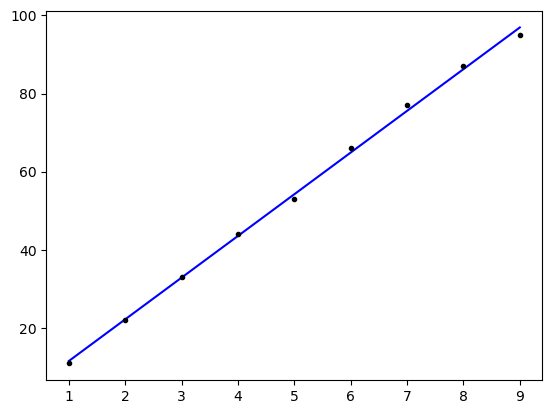

In [35]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')


위의 그래프에서 각 점은 우리가 실제 주었던 실제값에 해당되며, 
직선은 실제값으로부터 오차를 최소화하는 w와 b입니다. 

이 직선을 통해 9시간 30분을 공부하였을 때의 시험 성적을 예측

In [36]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 49ms/step
[[102.207085]]
